In [ ]:
#ML PROJECT 

In [4]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('tyres_train.csv')
print(df.shape)

(3000, 16)


In [5]:
df.head()

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure
0,17.990,26,1,0.16,0.01,-8.12,0,1,332.5,8,0,1,5.13,55.0,1,0
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,NaN,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,NaN,1,0
3,16.802,35,1,0.19,0.02,7.44,1,0,408.0,7,3,1,6.62,54.5,1,0
4,17.140,23,2,0.39,0.01,30.52,0,1,308.0,2,2,0,6.15,76.3,1,0


Attributes: 
- vulc            Numerical 
- perc_nat_rubber Numerical
- weather         Numerical
- perc_imp        Numerical
- temperature     Numerical 
- elevation       Numerical
- perc_exp_comp   Numerical
- diameter        Numerical
- tread_type      Categorical 
- tyre_season     Categorical 
- month           Categorical 
- tread_depth     Categorical 
- wiring_strenght Categorical
- tyre_quality    Categorical 
- add_layers      Categorical


Categorical attributes assume a finite number of distinct values, in most cases limited to less than a hundred, representing a qualitative property of
an entity to which they refer.
Numerical attributes assume a finite or infinite number of values and lend themselves to subtraction or division operations.

In [76]:
#come trattiamo le variabili categoriche 
print(df.dtypes)

vulc               float64
perc_nat_rubber      int64
wiring_strength      int64
weather            float64
perc_imp           float64
temperature        float64
tread_type           int64
tyre_season          int64
elevation          float64
month                int64
tread_depth          int64
tyre_quality         int64
perc_exp_comp      float64
diameter           float64
add_layers           int64
failure              int64
dtype: object


in which column of our dataset is there at least a missing values?

In [6]:
df.isna().any()

vulc               False
perc_nat_rubber    False
wiring_strength    False
weather            False
perc_imp           False
temperature        False
tread_type         False
tyre_season        False
elevation          False
month              False
tread_depth        False
tyre_quality       False
perc_exp_comp      False
diameter            True
add_layers         False
failure            False
dtype: bool

In [17]:
#percentuale di outliers in diameter
a=df['diameter'].isna().sum();
print("NaN value in diameter:",a)
print("Perc of outliers:", a/len(df)*100,"%")


NaN value in diameter: 2110
Perc of outliers: 70.33333333333334 %


In [79]:
#non considero la colonna dei diametri perchè ci sono un sacco di outliers
cat=df[["tyre_season","month",          "tread_depth","wiring_strength","tyre_quality","tread_type","add_layers" ]]
num=df[["vulc",       "perc_nat_rubber","weather",    "perc_imp",       "temperature", "elevation", "perc_exp_comp"]]

print(cat.shape)
print(num.shape)

(3000, 7)
(3000, 7)


In [81]:
cat.head()

,tyre_season,month,tread_depth,wiring_strength,tyre_quality,tread_type,add_layers
0,1,8,0,1,1,0,1
1,0,11,1,1,0,2,1
2,0,0,1,1,0,0,1
3,0,7,3,1,1,1,1
4,1,2,2,2,0,0,1


In [82]:
num.head()

,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp
0,17.990,26,0.16,0.01,-8.12,332.5,5.13
1,20.704,36,0.30,0.01,-4.52,328.0,6.15
2,19.156,34,0.30,0.01,-1.08,247.0,6.36
3,16.802,35,0.19,0.02,7.44,408.0,6.62
4,17.140,23,0.39,0.01,30.52,308.0,6.15


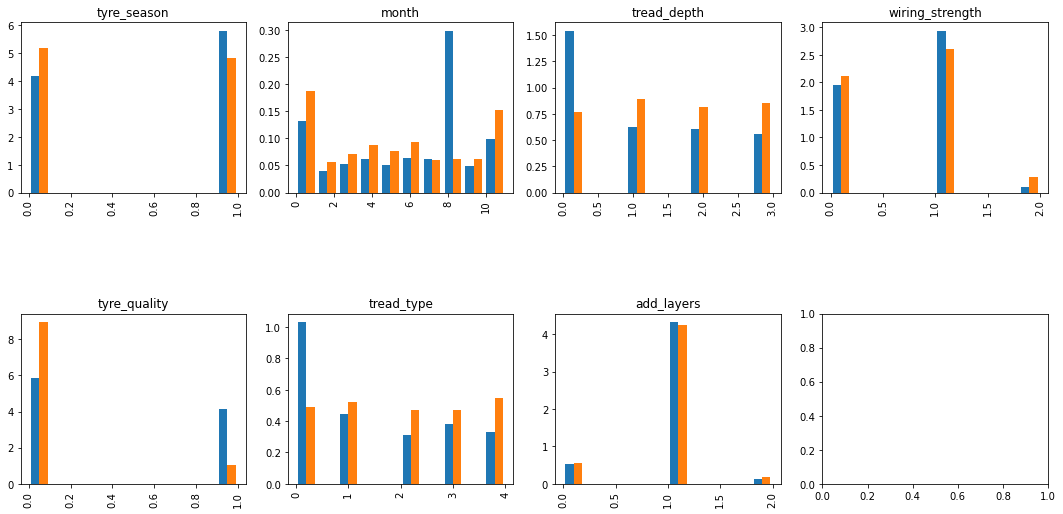

In [87]:
df_0=cat[df['failure']==0] # records wih target==0
df_1=cat[df['failure']==1] # records wih target==1


fig, axes = plt.subplots(2, 4,figsize=[15,7])
axes = axes.flatten()
fig.tight_layout(h_pad=10)
i=0
for x in cat.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([df_0[x],df_1[x]],density=True)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.title(x)
    i+=1
plt.show()

#blue --> test was succesfull 
#orange --> tast was not suf

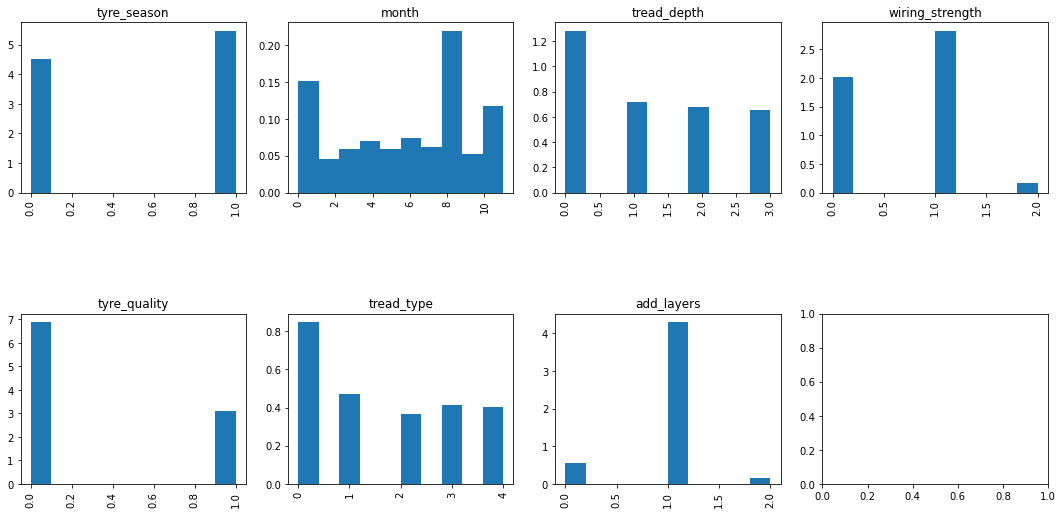

In [89]:
fig, axes = plt.subplots(2, 4,figsize=[15,7])
axes = axes.flatten()
fig.tight_layout(h_pad=10)

i=0
for x in cat.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist(cat[x],density=True)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.title(x)
    i+=1
plt.show()

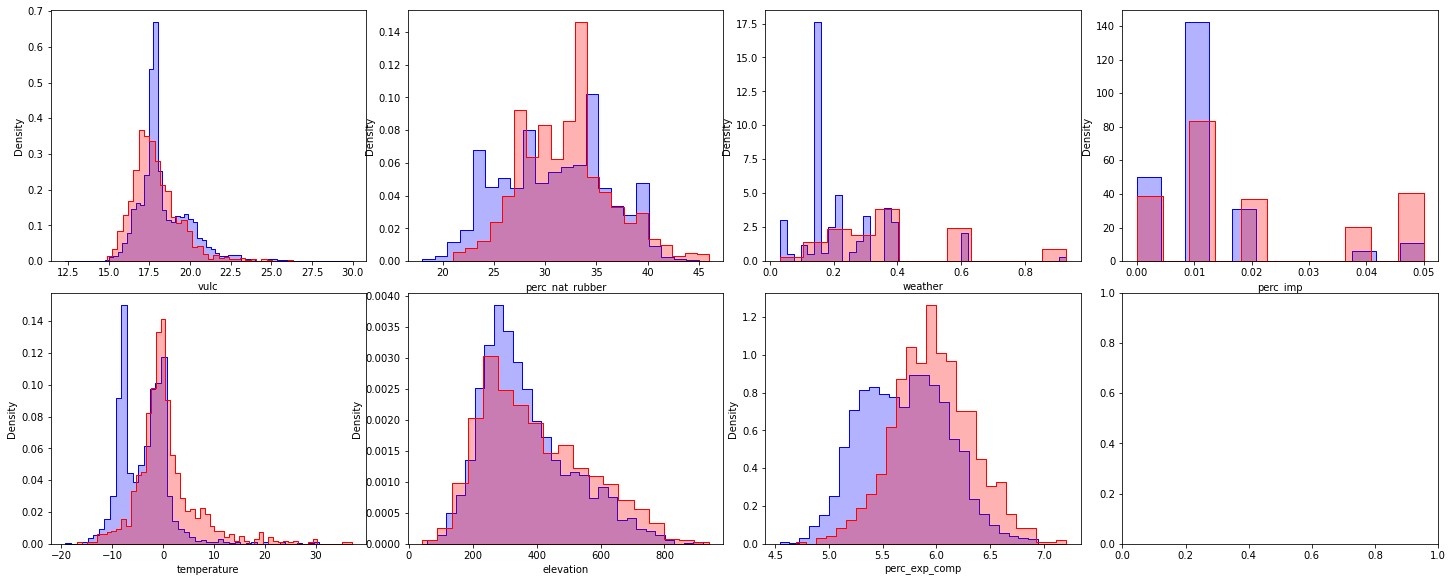

In [90]:

X0 = num[df['failure']==0]
X1 = num[df['failure']==1]

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(20,8))
fig.tight_layout()

for i, ax in zip(range(cat.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", ax=ax, stat='density', element="step",  alpha=0.3)
    sns.histplot(X1.iloc[:,i], color="red", ax=ax,stat='density', element="step",  alpha=0.3)
plt.show()

<AxesSubplot:>

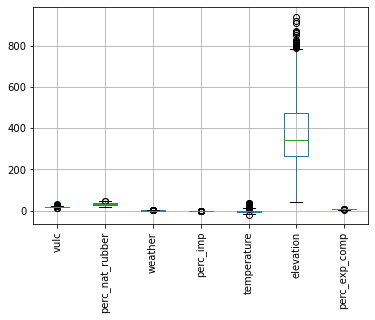

In [93]:
num.boxplot(rot=90)

#elevation has totally different numbers --> standardization 

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(num) # No target
scaled_num = pd.DataFrame(scaler.transform(num))
scaled_num.columns = num.columns
scaled_num.tail()

,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp
2995,-0.231083,-0.456093,0.584065,-0.319087,1.702514,-0.586827,-0.271809
2996,-0.698653,-0.253355,-0.343773,-1.020379,0.164930,-1.480129,0.045070
2997,-1.269567,0.354859,0.584065,-0.319087,-0.187726,-0.934222,-0.539937
2998,0.433093,1.165810,-1.380768,-1.020379,0.284834,-0.570284,0.240072
2999,1.315301,0.354859,-1.217032,-1.020379,0.912563,0.190677,0.508200


<AxesSubplot:>

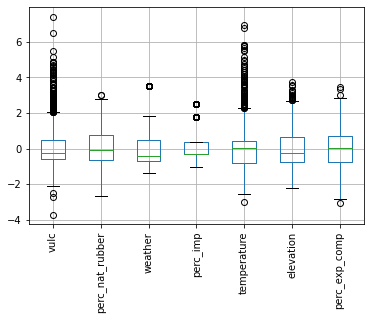

In [99]:
scaled_num.boxplot(rot=90)

#ok! 

In [101]:
#PCA fit
from sklearn.decomposition import PCA
# we can choose the number of components e.g. 10, the percentage of the total variance or set it to None (that means it automatically chooses the number of components)
pca = PCA()
pca.fit(scaled_num) #The fit learns some quantities from the data, most importantly the "components" and "explained variance"

PCA()

In [102]:
pd.DataFrame(pca.explained_variance_).transpose()

,0,1,2,3,4,5,6
0,2.611119,1.17498,1.042926,0.946682,0.7149,0.332083,0.179644


          0         1        2         3         4         5         6
0  0.372893  0.167798  0.14894  0.135195  0.102095  0.047425  0.025655


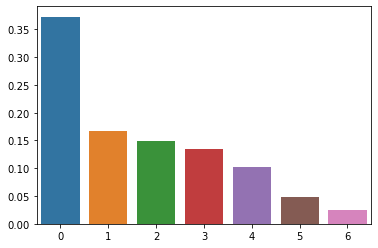

In [104]:
#VISUALIZE The percentage of variance explained by each of the selected components.
explained_var=pd.DataFrame(pca.explained_variance_ratio_).transpose()
print(explained_var)
ax = sns.barplot( data=explained_var)

In [106]:
cum_explained_var=np.cumsum(pca.explained_variance_ratio_)
cum_explained_var= pd.DataFrame(cum_explained_var).transpose()
cum_explained_var

,0,1,2,3,4,5,6
0,0.372893,0.540691,0.689631,0.824826,0.92692,0.974345,1.0


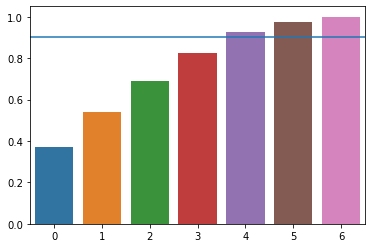

In [107]:
ax = sns.barplot(data=cum_explained_var)
ax.axhline(0.9)


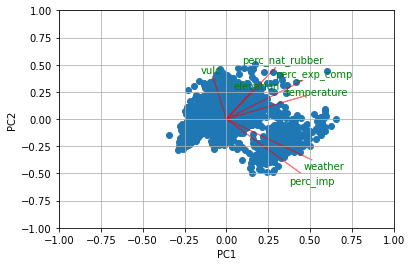

In [111]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pca.transform(scaled_num)[:,0:2],np.transpose(pca.components_[0:2, :]), num.columns)
plt.show()



#perc_imp e wheater sono correlate? 

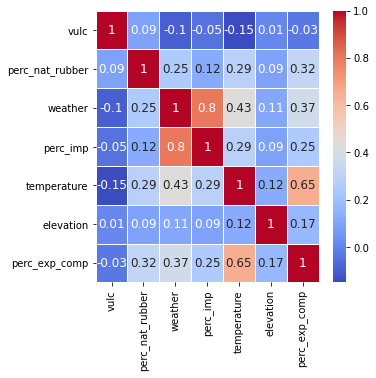

In [112]:
plt.figure(figsize = (5,5))
sns.heatmap(data=num.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

#perc_imp e  weather !! does make it sense?

In [141]:
X=pd.concat([scaled_num,cat], axis = 1)
print(X.shape)
X.tail()

(3000, 14)


,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp,tyre_season,month,tread_depth,wiring_strength,tyre_quality,tread_type,add_layers
2995,-0.231083,-0.456093,0.584065,-0.319087,1.702514,-0.586827,-0.271809,1,10,1,2,1,1,1
2996,-0.698653,-0.253355,-0.343773,-1.020379,0.164930,-1.480129,0.045070,1,6,1,1,0,1,1
2997,-1.269567,0.354859,0.584065,-0.319087,-0.187726,-0.934222,-0.539937,0,8,3,1,1,1,0
2998,0.433093,1.165810,-1.380768,-1.020379,0.284834,-0.570284,0.240072,0,11,0,0,0,4,0
2999,1.315301,0.354859,-1.217032,-1.020379,0.912563,0.190677,0.508200,0,2,1,2,0,1,0


In [142]:
y=df['failure']

In [143]:
len(y)

3000

In [144]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30,   #by default is 75%-25%
                                                    stratify=y,        #preserve target propotions 
                                                    random_state= 321) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(2100, 14) (900, 14)


## Models

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [146]:
#funzioni 


def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    print("f1         train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) )) 
    print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) )) 
    print("")
    print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))

def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

In [147]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(5,500,20)}
hyperp_search(classifier,parameters)

f1_train: 0.497186 using {'n_neighbors': 5}
f1         train 0.687   test 0.531
precision  train 0.738   test 0.570

[[485 113]
 [152 150]]


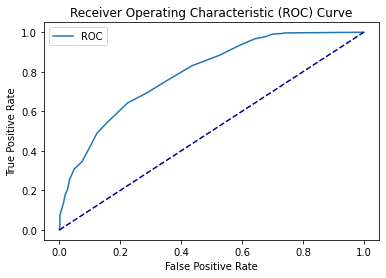

AUC: 0.79


In [148]:
model_knn = KNeighborsClassifier(n_neighbors=30)
fpr1,tpr1=roc(model_knn,X_train,y_train,X_test,y_test)

In [149]:
#Tree

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [4,5,6,8,10],
              'min_samples_split': [5,10,20,25],
              'min_samples_leaf': [5,10,20]}

hyperp_search(classifier,parameters)

f1_train: 0.507200 using {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 25}
f1         train 0.724   test 0.564
precision  train 0.720   test 0.562

[[465 133]
 [131 171]]


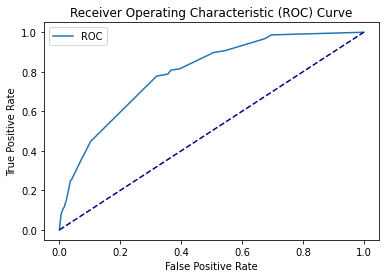

AUC: 0.80


In [150]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=20)

fpr2,tpr2=roc(model_tree,X_train,y_train,X_test,y_test)


In [151]:
from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":[0.1,100]}

hyperp_search(classifier,parameters)

f1_train: 0.539024 using {'C': 100, 'kernel': 'linear'}
f1         train 0.538   test 0.585
precision  train 0.691   test 0.706

[[535  63]
 [151 151]]


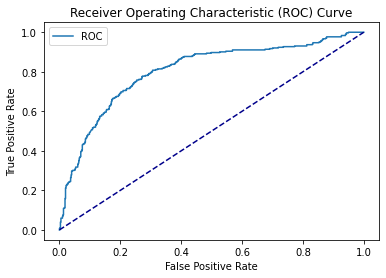

AUC: 0.80


In [152]:
model = SVC(C=100, kernel='linear',probability=True)

fpr5,tpr5=roc(model,X_train,y_train,X_test,y_test)

In [153]:
# Multi-layer Perceptron classifier

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(10, 5),(100,20,5)],  "max_iter": [2000], "alpha": [0.001,0.1]}

hyperp_search(classifier,parameters)

f1_train: 0.559927 using {'alpha': 0.001, 'hidden_layer_sizes': (10, 5), 'max_iter': 2000}
f1         train 0.608   test 0.606
precision  train 0.697   test 0.679

[[520  78]
 [137 165]]


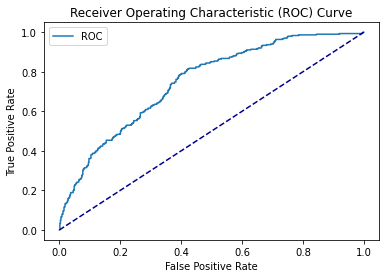

AUC: 0.75


In [154]:
model_MLP=MLPClassifier(hidden_layer_sizes=(100,20,5), alpha=0.1, max_iter=2000)

fpr6,tpr6=roc(model_MLP,X_train,y_train,X_test,y_test)

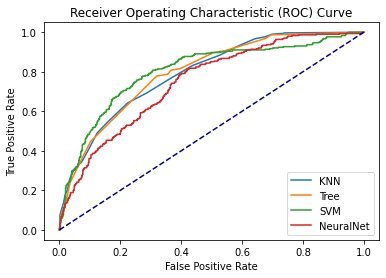

In [155]:
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Tree")   
plt.plot(fpr5, tpr5, label= "SVM")
plt.plot(fpr6, tpr6, label= "NeuralNet")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
